In [1]:
import h2o
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import h2o.grid
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator

In [2]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.11" 2021-04-20; OpenJDK Runtime Environment (build 11.0.11+9-Ubuntu-0ubuntu2.20.04); OpenJDK 64-Bit Server VM (build 11.0.11+9-Ubuntu-0ubuntu2.20.04, mixed mode, sharing)
  Starting server from /home/gerd/Documents/Python/venvs/kaggle/lib/python3.8/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpq39fvqa9
  JVM stdout: /tmp/tmpq39fvqa9/h2o_gerd_started_from_python.out
  JVM stderr: /tmp/tmpq39fvqa9/h2o_gerd_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,Europe/Vienna
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.3
H2O_cluster_version_age:,1 month
H2O_cluster_name:,H2O_from_python_gerd_eduyoc
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.867 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"accepting new members, healthy"


In [3]:
data = h2o.import_file('./data/prepped-train.csv')
prediction_frame = h2o.import_file('./data/test.csv')

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [4]:
train, valid, test = data.split_frame([0.8, 0.1], seed=69)

In [5]:
train.summary()

,C1,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,target
type,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,enum
mins,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,
mean,99973.68498381389,99973.68498381389,0.977820690689565,1.163866911645232,2.2065944229879877,2.2931618483382703,0.7954428987463601,1.4226567675328412,1.0068556501306136,0.6686914894946692,1.9433112102691015,1.715999850013123,1.4186508680490462,0.9746772157436228,2.444742335045684,1.0736623045483513,1.4078330646068473,1.423237966677916,1.3907783068981465,0.31746597172747376,1.6577861937080514,6.18573374829702,1.4439236566800404,1.035728123789169,1.4559913507568092,0.5705000812428915,1.0662692014448731,2.3446698413888787,0.7714699963753173,0.7957241241391383,2.324109140450212,1.5706125714000025,0.5988101041158896,1.8584748834476983,1.5103178471883711,1.5570262602022327,0.6820590698313895,1.1617608459259823,0.6664166885397526,1.5008186783656432,1.269382679015586,2.324815328658743,1.2494219255815113,1.1541802592273172,0.838389140950167,4.47827065131801,0.8923406701913582,0.6914145012311421,2.4109015461147156,0.9670903795917861,1.524116639794018,0.47836439311560214,2.2679578036921773,1.6160085992475655,0.622964240628945,1.3520504455860112,6.000749934380743,2.4958441136400578,2.1151899208819227,0.5620945667254116,0.9262439536540553,1.3422325546514684,1.6652167935305662,1.2854062769507668,2.7555838864099393,1.4612533903283467,0.6993575562138309,1.7936493056857525,0.5081430374842202,1.8230592323171722,0.9049520666941646,1.6037659204819572,1.216131088529754,0.8069293936780537,1.2834439486544928,2.9422800504955795,0.6320259477295737,
maxs,199999.0,199999.0,61.0,51.0,64.0,70.0,38.0,76.0,43.0,30.0,38.0,72.0,33.0,46.0,37.0,43.0,32.0,121.0,27.0,14.0,22.0,263.0,30.0,33.0,123.0,22.0,69.0,149.0,24.0,84.0,105.0,84.0,22.0,39.0,78.0,41.0,36.0,41.0,42.0,34.0,41.0,49.0,81.0,73.0,53.0,63.0,27.0,30.0,117.0,97.0,40.0,38.0,56.0,73.0,38.0,36.0,104.0,76.0,46.0,31.0,30.0,352.0,231.0,80.0,102.0,80.0,25.0,54.0,24.0,79.0,55.0,65.0,67.0,30.0,61.0,130.0,52.0,
sigma,57730.31808431651,57730.31808431651,3.969045455496427,3.9806094519549027,6.435948804801255,7.544401004996039,2.9418615788068943,5.129563966977725,3.9257412759984325,2.2199464302603094,3.9297312406108373,5.915203415762189,3.277490401479158,3.8205706659766596,3.423177047616167,3.694131610158619,2.8710810917346126,8.29004795233004,3.0623731777683676,1.0484445503773023,2.559841948125005,13.967357897271235,2.6816189640400787,2.9391266158799874,6.701968777009058,1.6716531134437456,5.732781850434396,7.332004292474126,1.734888301413475,3.5572402689685494,8.392658761673726,5.523140570869078,1.4194915881465913,3.898927257089224,7.763674587008591,3.9104046697039583,2.3079191

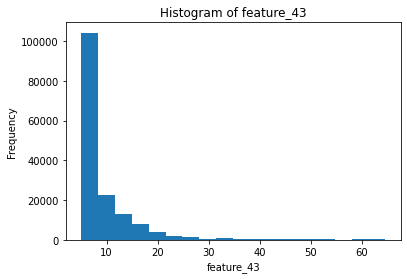

In [39]:
train["feature_43"].hist()

In [7]:
features = train.columns
features.remove("id")
features.remove("C1")
features.remove("target")

target = "target"

In [8]:
features

['feature_0',
 'feature_1',
 'feature_2',
 'feature_3',
 'feature_4',
 'feature_5',
 'feature_6',
 'feature_7',
 'feature_8',
 'feature_9',
 'feature_10',
 'feature_11',
 'feature_12',
 'feature_13',
 'feature_14',
 'feature_15',
 'feature_16',
 'feature_17',
 'feature_18',
 'feature_19',
 'feature_20',
 'feature_21',
 'feature_22',
 'feature_23',
 'feature_24',
 'feature_25',
 'feature_26',
 'feature_27',
 'feature_28',
 'feature_29',
 'feature_30',
 'feature_31',
 'feature_32',
 'feature_33',
 'feature_34',
 'feature_35',
 'feature_36',
 'feature_37',
 'feature_38',
 'feature_39',
 'feature_40',
 'feature_41',
 'feature_42',
 'feature_43',
 'feature_44',
 'feature_45',
 'feature_46',
 'feature_47',
 'feature_48',
 'feature_49',
 'feature_50',
 'feature_51',
 'feature_52',
 'feature_53',
 'feature_54',
 'feature_55',
 'feature_56',
 'feature_57',
 'feature_58',
 'feature_59',
 'feature_60',
 'feature_61',
 'feature_62',
 'feature_63',
 'feature_64',
 'feature_65',
 'feature_66',
 'fea

In [13]:
#
# APPROACH 1: grid search deep learning model
#

In [14]:
grid = h2o.grid.H2OGridSearch(H2ODeepLearningEstimator(epochs=30, hidden = [400, 400], activation = "RectifierWithDropout", distribution="multinomial"),
                                search_criteria={"strategy":"RandomDiscrete", "max_models":5},
                                hyper_params={"seed":77, "l1":[0, 1e-6, 3e-6, 1e-5], "l2":[0, 1e-6, 3e-6, 1e-5],
                                             "input_dropout_ratio":[0, 0.1, 0.2, 0.3], #drops random n percent of input neurons
                                             "hidden_dropout_ratios":[[0,0], [0.2, 0.2], [0.4, 0.4], [0.6, 0.6]] #drops random n percent of hidden neurons
                                             },
                                grid_id="deeplearning-grid"
               )

grid.train(x = features, y = target, training_frame = train, validation_frame = valid)

deeplearning Grid Build progress: |███████████████████████████████████████| 100%


In [16]:
grid.logloss()

{'deeplearning-grid_model_2': 1.7567585601688132,
 'deeplearning-grid_model_5': 1.7605834360339094,
 'deeplearning-grid_model_4': 1.7580911541966284,
 'deeplearning-grid_model_3': 1.7527778322642873,
 'deeplearning-grid_model_1': 1.7534067499854133}

In [ ]:
#
# APPROACH 2: grid search generalized linear model
#

In [9]:
grid2 = h2o.grid.H2OGridSearch(
    H2OGeneralizedLinearEstimator(
    family = "multinomial",
    lambda_search = True,
    balance_classes = True,
    ),
    hyper_params = {
        "alpha":[x * 0.01 for x in range (0, 100)],
    },
    search_criteria = {
        "strategy":"RandomDiscrete",
        "max_models":8,
        "max_runtime_secs":60
    },
    grid_id="glm-grid",
)
grid2.train(x = features, y = target, training_frame = train, validation_frame = valid)

glm Grid Build progress: |████████████████████████████████████████████████| 100%


In [ ]:
#
# APPROACH 3: gbm model
#

In [26]:
gbm = H2OGradientBoostingEstimator(model_id = 'gbm-model', stopping_metric='logloss', balance_classes= True, score_tree_interval=1,
                                                  stopping_tolerance=0.00005 ,stopping_rounds=6, ntrees=1500, nfolds=8, max_depth=8)

gbm.train(x = features, y = target, training_frame = train, validation_frame = valid)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [31]:
gbm.model_performance(valid)


ModelMetricsMultinomial: gbm
** Reported on test data. **

MSE: 0.616807822278137
RMSE: 0.7853711366469595
LogLoss: 1.776701741945313
Mean Per-Class Error: 0.8199525474561421
AUC: NaN
AUCPR: NaN
Multinomial auc values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).
Multinomial auc_pr values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9,Error,Rate
0,0.0,209.0,0.0,0.0,0.0,289.0,0.0,414.0,11.0,1.000000,923 / 923
1,0.0,1168.0,4.0,0.0,0.0,512.0,1.0,697.0,14.0,0.512521,"1,228 / 2,396"
2,0.0,517.0,1.0,0.0,0.0,385.0,1.0,532.0,7.0,0.999307,"1,442 / 1,443"
3,0.0,110.0,0.0,0.0,0.0,127.0,0.0,237.0,4.0,1.000000,478 / 478
4,0.0,54.0,0.0,0.0,0.0,96.0,0.0,150.0,3.0,1.000000,303 / 303
5,1.0,440.0,7.0,0.0,0.0,2723.0,3.0,1952.0,15.0,0.470337,"2,418 / 5,141"
6,0.0,169.0,3.0,0.0,0.0,469.0,2.0,869.0,11.0,0.998687,"1,521 / 1,523"
7,0.0,440.0,7.0,0.0,0.0,1589.0,0.0,3040.0,31.0,0.404739,"2,067 / 5,107"
8,0.0,552.0,4.0,0.0,0.0,712.0,5.0,1205.0,15.0,0.993983,"2,478 / 2,493"
9,1.0,3659.0,26.0,0.0,0.0,6902.0,12.0,9096.0,111.0,0.649164,"12,858 / 19,807"



Top-9 Hit Ratios: 


,k,hit_ratio
0,1,0.350836
1,2,0.569445
2,3,0.693745
3,4,0.795476
4,5,0.864290
5,6,0.919018
6,7,0.960317
7,8,0.984450
8,9,1.000000


In [32]:
gbm.predict(test)

gbm prediction progress: |████████████████████████████████████████████████| 100%


predict,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
Class_8,0.0576666,0.230453,0.0770094,0.0344113,0.0146256,0.0922538,0.0573696,0.282417,0.153794
Class_6,0.045369,0.0994446,0.0960397,0.0235344,0.0164657,0.380651,0.0532611,0.162464,0.122771
Class_8,0.0245533,0.0429583,0.0367359,0.0118817,0.0100946,0.167921,0.0651797,0.539599,0.101076
Class_8,0.049518,0.111124,0.0691728,0.022076,0.0144166,0.127203,0.0865473,0.362279,0.157663
Class_6,0.0416364,0.0801417,0.0683476,0.0235931,0.0158717,0.294478,0.0740896,0.269887,0.131955
Class_6,0.0485461,0.0393676,0.0304568,0.0183858,0.00884647,0.364341,0.0603073,0.317337,0.112411
Class_8,0.0425484,0.0368099,0.0289644,0.0205901,0.0120803,0.178978,0.135754,0.427916,0.116359
Class_2,0.050079,0.315056,0.1423,0.0271234,0.0137857,0.144263,0.0437659,0.121513,0.142114
Class_8,0.047484,0.0597629,0.0376203,0.02074,0.0125251,0.212612,0.0925589,0.38572,0.130977
Class_6,0.0415769,0.0839226,0.0402688,0.016759,0.0108101,0.322141,0.0688176,0.309236,0.106469


In [33]:
output = gbm.predict(prediction_frame)

gbm prediction progress: |████████████████████████████████████████████████| 100%


In [ ]:
'''
FINDINGS:
    Deep Learning:
    - feature 20 seems to be very important
    
    GLM:
    - feature 12 and 43 seem to be very important
    
'''

In [ ]:
#saving model
gbm_save = h2o.get_model(gbm.model_id)
h2o.save_model(gbm_save, './models')


In [35]:
output = output.as_data_frame()
ids = prediction_frame.as_data_frame()["id"]
result = pd.concat([ids, output], axis=1)
result = result.drop(["predict"], axis=1)
result.to_csv('./data/prediction-output.csv', index=False)

In [ ]:
h2o.cluster().shutdown()